Decoding Climate Patterns: Analyzing the Prevalence of Weather Conditions Worldwide

In [73]:
#List of libraries used (Import Statements)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [75]:
#Reading the dataset
data = pd.read_csv(r"C:\Users\Sutharshan\Downloads\archive\GlobalWeatherRepository.csv")

In [77]:
#Getting the shape of the entire data bundle
data.shape

(30876, 41)

In [79]:
#Finding out and preprocess the dataset wheather having any null values in any columns
null_data = data.isnull().sum()
print("Sum of missing values in the dataset : " , null_data)
null_data = data.isnull().sum().sum()
if null_data > 0:
    print(f"Missing values :: {null_data}")
else:
    print(f"There are no any missing values!!")

Sum of missing values in the dataset :  country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_qual

In [81]:
#Visualise the dataset in a proper table format with the first 5 rows
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [83]:
#Get the more core description on about the dataset
data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,30876.000000,30876.000000,3.087600e+04,30876.000000,30876.000000,30876.000000,30876.000000,30876.000000,30876.000000,30876.000000,...,30876.000000,30876.00000,30876.000000,30876.000000,30876.000000,30876.000000,30876.000000,30876.000000,30876.000000,30876.000000
mean,19.131456,21.972228,1.722712e+09,25.650317,78.172130,8.546431,13.758158,175.892991,1012.515643,29.898903,...,20.218662,459.97785,64.746926,10.214369,7.406904,18.038164,33.980502,1.446398,1.986332,50.418480
std,24.485023,65.855005,4.036895e+06,7.203871,12.967115,11.707903,18.842193,100.290595,6.270691,0.184861,...,20.193751,1059.44633,42.404624,22.548296,59.714455,47.991551,77.173416,0.822050,1.998965,35.049992
min,-41.300000,-175.200000,1.715849e+09,-10.400000,13.200000,2.200000,3.600000,1.000000,971.000000,28.670000,...,3.600000,-9999.00000,0.000000,0.000000,-9999.000000,0.370000,0.500000,1.000000,1.000000,0.000000
25%,3.750000,-6.840000,1.719150e+09,22.000000,71.600000,4.300000,6.800000,92.000000,1009.000000,29.800000,...,11.300000,205.30000,34.700000,0.600000,0.500000,2.900000,5.300000,1.000000,1.000000,15.000000
50%,17.250000,23.320000,1.722775e+09,26.500000,79.700000,7.600000,12.200000,172.000000,1013.000000,29.910000,...,18.400000,264.55000,60.000000,2.100000,1.500000,8.140000,13.700000,1.000000,1.000000,52.000000
75%,40.400000,49.882200,1.726231e+09,29.900000,85.800000,11.900000,19.100000,260.000000,1016.000000,30.000000,...,26.300000,400.50000,89.400000,7.955000,5.500000,18.685000,32.900000,2.000000,2.000000,85.000000
max,64.150000,179.220000,1.729588e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,1045.000000,30.860000,...,2970.400000,38879.39800,480.700000,427.700000,255.855000,1614.100000,1814.400000,6.000000,10.000000,100.000000


In [85]:
#The information of the dataset with the each column along with the data type of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30876 entries, 0 to 30875
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       30876 non-null  object 
 1   location_name                 30876 non-null  object 
 2   latitude                      30876 non-null  float64
 3   longitude                     30876 non-null  float64
 4   timezone                      30876 non-null  object 
 5   last_updated_epoch            30876 non-null  int64  
 6   last_updated                  30876 non-null  object 
 7   temperature_celsius           30876 non-null  float64
 8   temperature_fahrenheit        30876 non-null  float64
 9   condition_text                30876 non-null  object 
 10  wind_mph                      30876 non-null  float64
 11  wind_kph                      30876 non-null  float64
 12  wind_degree                   30876 non-null  int64  
 13  w

#Code for countplot 
"Here we have taken the top 10 countries in the world based on where the higher number of weather records. "

In [87]:
#Filtering the top 15 countries which has the higher number of weather conditions.
top_countries = data['country'].value_counts().nlargest(15).index
print(top_countries)

Index(['Bulgaria', 'Indonesia', 'Madagascar', 'Sudan', 'Iran', 'Belgium',
       'Thailand', 'Bolivia', 'Turkey', 'Vietnam', 'Russia', 'Kenya',
       'Iceland', 'Malawi', 'Mauritius'],
      dtype='object', name='country')


In [89]:
#Function to plot the Relational Graph - Bar chart 
def plot_bar_count_of_weather_records():
    filtered_data = data[data['country'].isin(top_countries)]
    plt.figure(figsize = (12,6))
    count = sns.countplot(data=filtered_data, x='country', order=top_countries)

    for p in count.patches:
        count_val = int(p.get_height())
        count.annotate(f'{count_val}', (p.get_x() + p.get_width() / 2.0, p.get_height()), ha = 'center', va = 'bottom', fontsize=10, color='black', xytext=(0,5), textcoords='offset points', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.5'))

    plt.title('Count of Weather Records by Top 15 Countries', fontsize=16, fontweight='bold')  
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Number of Weather Records', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("weather_records_bar_chart.png", dpi=300, bbox_inches='tight')
    plt.show()
    return

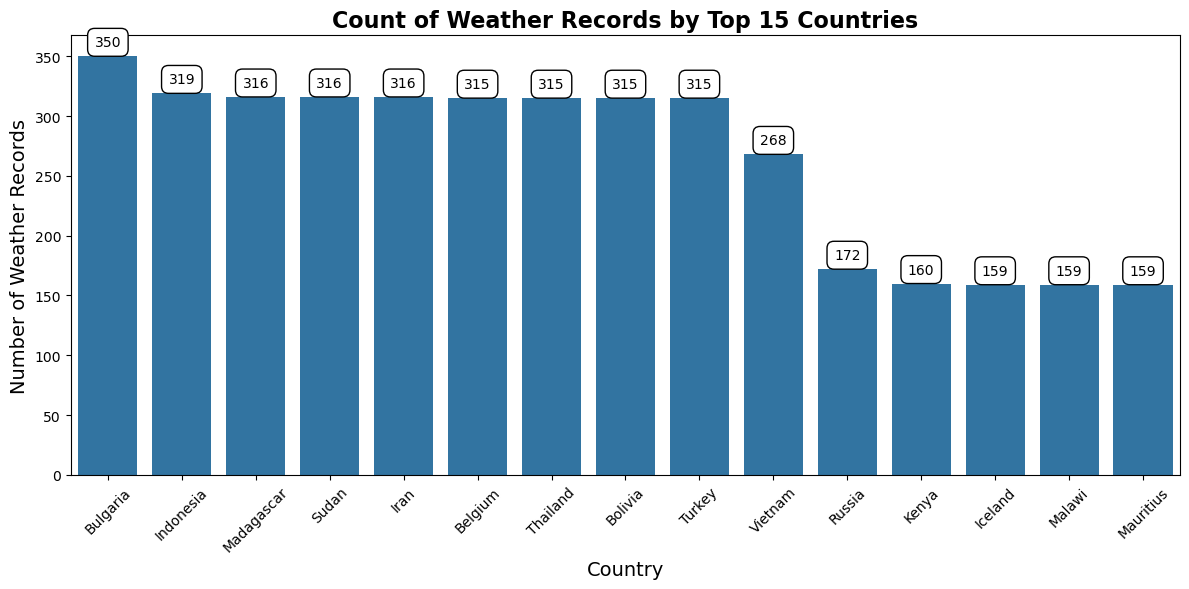

In [91]:
#Calling the function to plot the bar chart
plot_bar_count_of_weather_records()

In [93]:
#Function to plot the Categorical Graph - Scatter Plot
def plot_scatter_plot():
    data['last_updated'] = pd.to_datetime(data['last_updated'])
    figure = px.scatter(data, 
                     x='humidity', 
                     y='temperature_celsius', 
                     color='condition_text',  
                     animation_frame='country',  
                     title='Scatter Plot of Weather Distributions Worldwide',
                     labels={
                         'temperature_celsius': 'Temperature (°C)',
                         'humidity': 'Humidity (%)',
                     })
    figure.update_traces(marker=dict(size=8)) 
    figure.update_layout(
        width=800, height=600,
        scene=dict(
            xaxis_title='Temperature (°C)',
            yaxis_title='Humidity (%)',
    ),
    title=dict(
        text='Scatter Plot of Weather Distributions Worldwide',
        font=dict(size=20, family="Arial", color="black", weight="bold") 
    )
    )
    figure.show()
    return

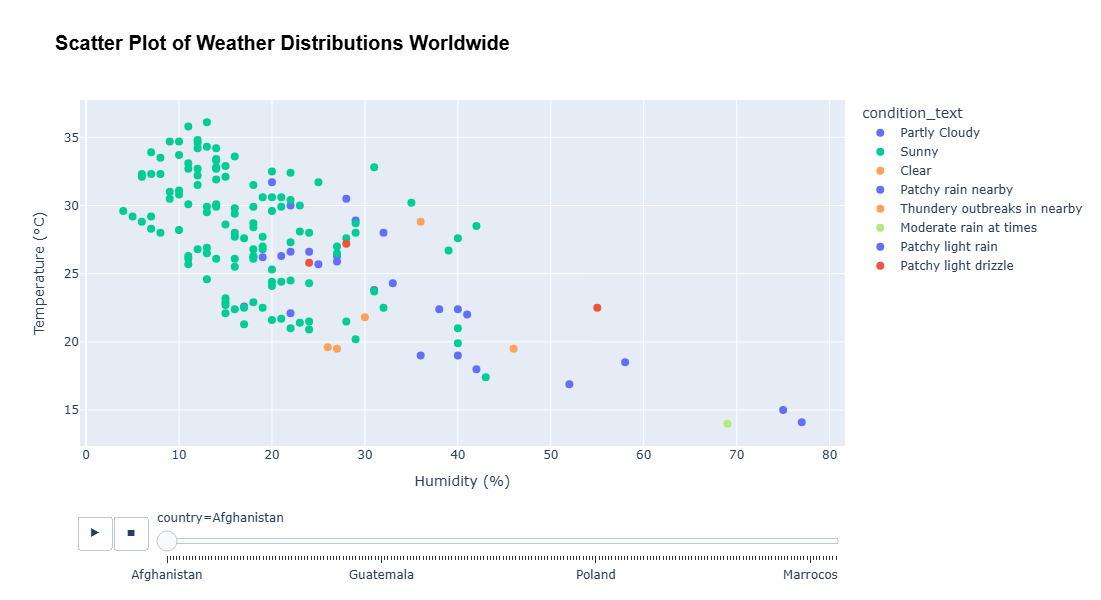

In [95]:
#Calling the function to plot the Scatter graph
plot_scatter_plot()

In [27]:
# Get frequency count of each weather condition
weather_counts = data['condition_text'].value_counts()
print(weather_counts)


condition_text
Partly cloudy                                  10656
Sunny                                           9800
Patchy rain nearby                              2588
Partly Cloudy                                   1465
Clear                                           1153
Overcast                                        1005
Light rain shower                                900
Light rain                                       844
Mist                                             576
Moderate or heavy rain with thunder              329
Moderate rain                                    249
Cloudy                                           248
Patchy light rain with thunder                   219
Fog                                              194
Light drizzle                                    137
Patchy light drizzle                             124
Moderate or heavy rain shower                     85
Thundery outbreaks in nearby                      83
Patchy light rain              

In [29]:
# Group by location and condition to see frequency of each condition per location
location_weather_counts = data.groupby(['location_name', 'condition_text']).size().unstack(fill_value=0)
print(location_weather_counts.head())


condition_text     Blizzard  Clear  Cloudy  Fog  Freezing fog  Heavy rain  \
location_name                                                               
'S Gravenjansdijk         0      0       1    0             0           0   
'S Gravenjansdyk          0      0       0    0             0           0   
'S Gravenstaffel          0      0       0    0             0           0   
-Kingdom                  0      0       0    0             0           0   
Abu Dhabi                 0      1       0    0             0           0   

condition_text     Heavy rain at times  Light drizzle  Light rain  \
location_name                                                       
'S Gravenjansdijk                    0              5           3   
'S Gravenjansdyk                     0              0           1   
'S Gravenstaffel                     0              0           4   
-Kingdom                             0              0           0   
Abu Dhabi                            0        

In [109]:
def plot_violin_graph():
    top_most_country = data['country'].value_counts().nlargest(1).index.tolist()
    data_top_most_country = data[data['country'].isin(top_most_country)]
    cols = 2 
    rows = int(np.ceil(len(top_most_country) / cols))
    fig, axs = plt.subplots(rows, cols, figsize=(12, 5 * rows))
    axs = axs.flatten()
    #fig.suptitle('Violin Plots of Temperature in Celsius for Top 20 Countries', fontsize=16, fontweight='bold')

    for i, country in enumerate(top_most_country):
        sns.violinplot(data=data_top_most_country[data_top_most_country['country'] == country],
                       x='location_name', y='temperature_celsius', ax=axs[i])
        axs[i].set_title(f'Violin Plot of Temperature in Celsius for {country}', fontsize=16, fontweight='bold') 
        axs[i].set_xlabel('Location')
        axs[i].set_ylabel('Temperature (°C)')
        axs[i].tick_params(axis='x', rotation=45)
        axs[i].grid()

    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig("weather_distribution_violin_plot.png", dpi=300, bbox_inches='tight')
    plt.show()
    return

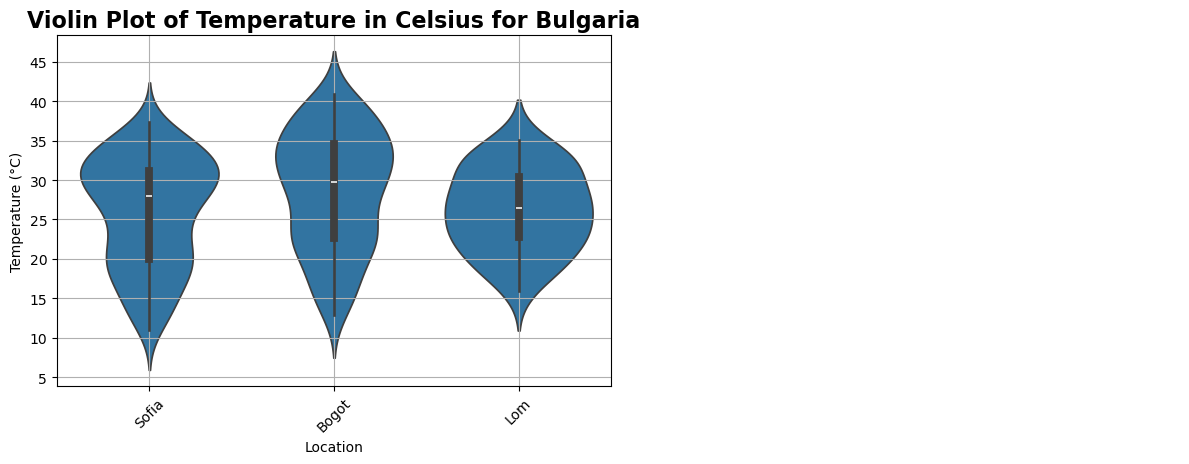

In [111]:
#Calling the function to plot the violin graph
plot_violin_graph()